In [ ]:
''' We need to set 2 types of parameter before modeling 
1. Distance metrics - Euclidian, Manhattan, Cosine
2. Linkage parameters - Ward, Complete, Average 

Parameter selection method - trial and error

Basically every set of parameters are used, those parameters which gives 
accurate results are selected'''

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering

import sklearn.metrics as sm


In [4]:
np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [7]:
addr = "C:/Users/Sujay/Workspace/CH03_Cluster_Analysis/mtcars.csv"
cars = pd.read_csv(addr)
cars.columns = ['cars_name','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

X = cars.iloc[:,[1,3,4,6]].values
Y = cars.iloc[:,(9)].values

In [14]:
Z = linkage(X,'ward')

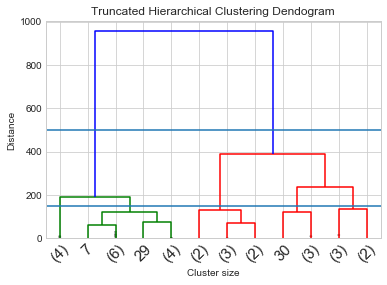

In [16]:
dendrogram(Z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [21]:
k=2 
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(Y,Hclustering.labels_)

0.78125

In [26]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(Y,Hclustering.labels_)

0.4375

In [27]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='average')
Hclustering.fit(X)

sm.accuracy_score(Y,Hclustering.labels_)

0.78125

In [30]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan',linkage='average')
Hclustering.fit(X)

sm.accuracy_score(Y,Hclustering.labels_)


0.71875